# **COLLECTING FER2013 DATA SET USING KAGGLE API KEY INTO GOOGLE COLLAB**

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [6]:
!kaggle datasets download -d msambare/fer2013

 88% 53.0M/60.3M [00:00<00:00, 287MB/s]
100% 60.3M/60.3M [00:00<00:00, 286MB/s]


In [7]:
!ls


drive  fer2013.zip  kaggle.json  model.h5  sample_data


In [8]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

# **IMPORT LIBRARIES**

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, Activation, MaxPooling2D, Dropout,BatchNormalization
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.inception_v3 import InceptionV3
#from Ttensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tensorflow.keras.initializers import  glorot_uniform
np.random.seed(seed=2) #Do not change this value

In [ ]:
device_list=tf.test.gpu_device_name()

In [ ]:
if device_list!='/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_list))

Found GPU at: /device:GPU:0


In [3]:
train_path = '/content/train'
valid_path = '/content/test'

In [4]:
  #  for getting number of output classes
folders = glob('/content/train/*')
print(folders)

['/content/train/disgust', '/content/train/angry', '/content/train/sad', '/content/train/happy', '/content/train/neutral', '/content/train/fear', '/content/train/surprise']


In [ ]:
print(len(folders))

7


In [ ]:
imagenames_list = []
for folder in folders:
    f=glob(folder+'/*.jpg');
    imagenames_list.append(f[0])
    

In [ ]:
image=[]
for folder in folders:
  for f in glob(folder+'/*.jpg'):
    img=cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    cv2.imwrite(f,img)


In [ ]:
folder_test=glob('/content/test/*')

In [ ]:
len(folder_test)

7

In [ ]:
for folder in folder_test:
  for f in glob(folder+'/*.jpg'):
    img=cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    print(img.shape)
    cv2.imwrite(f,img)

In [ ]:
print(len(imagenames_list))

7


In [ ]:
print(imagenames_list)

['/content/train/surprise/Training_93492148.jpg', '/content/train/disgust/Training_18809541.jpg', '/content/train/fear/Training_92235969.jpg', '/content/train/happy/Training_29012270.jpg', '/content/train/angry/Training_58232441.jpg', '/content/train/sad/Training_19310993.jpg', '/content/train/neutral/Training_21380529.jpg']


In [ ]:
import cv2
read_images=[]
for images in imagenames_list:
  read_images.append(cv2.imread(images,cv2.IMREAD_GRAYSCALE))

In [ ]:
print(len(read_images))

7


In [ ]:
l=['Disgust','Fear','Happy','Surprise','Angry','Sad','Neutral']

In [ ]:
read_images[0].shape

(48, 48)

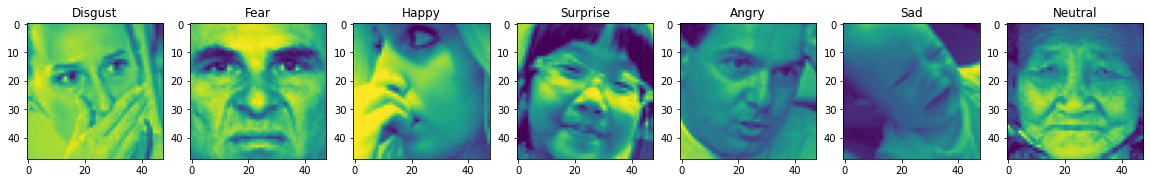

In [ ]:
fig,arr= plt.subplots(1, len(read_images), figsize=(20,5))
for i in range(len(read_images)):
  arr[i].imshow(read_images[i])
  arr[i].set_title(l[i])

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (48,48),
                                                 batch_size = 64,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [7]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (48,48),
                                            batch_size = 64,
                                            color_mode="grayscale",
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [ ]:
def convolutional_model(input_shape,initializer):
  input_img=tf.keras.Input(shape=input_shape)
  X=Conv2D(filters = 64 , kernel_size= (3,3),strides=(1,1), padding='same')(input_img)
  X= BatchNormalization()(X)
  X=Activation('relu')(X)
  X=Conv2D(filters = 64 , kernel_size= (3,3), strides=(1,1), padding='same')(X)
  X= BatchNormalization()(X)
  X=Activation('relu')(X)
  X=MaxPooling2D(pool_size=(2,2))(X)
  X=Dropout(0.3)(X)

  X=Conv2D(filters = 128 , kernel_size= (3,3),strides=(1,1),  padding='same')(X)
  X= BatchNormalization()(X)
  X=Activation('relu')(X)
  X=MaxPooling2D(pool_size=(2,2))(X)
  X=Dropout(0.3)(X)
  
  X=Conv2D(filters = 128 , kernel_size= (3,3),strides=(1,1),  padding='same')(X)
  X= BatchNormalization()(X)
  X=Activation('relu')(X)
  X=MaxPooling2D(pool_size=(2,2))(X)

  X = Flatten()(X)
  X=Dense(len(folders), activation='softmax')(X)
  X=Model(inputs=input_img, outputs=X)
  return X

In [ ]:
model=convolutional_model((48,48,1),glorot_uniform)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                             

In [ ]:
# model=convolutional_model((128,128,1),glorot_uniform)
model.compile(loss='categorical_crossentropy',
  optimizer= tf.keras.optimizers.SGD(learning_rate=0.15),
  metrics=['accuracy'])
  # hist = model.fit_generator(
  # training_set,
  # validation_data=test_set,
  # epochs=50,
  # steps_per_epoch=len(training_set)/64,
  # validation_steps=len(test_set)/64)

In [ ]:
with tf.device('/device:GPU:0'):
  model=convolutional_model((48,48,1),glorot_uniform)
  model.compile(loss='categorical_crossentropy',
  optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
  metrics=['accuracy'])
  hist = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=500,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


449/449 [==============================] - 21s 46ms/step - loss: 2.7670 - accuracy: 0.2443 - val_loss: 1.8824 - val_accuracy: 0.2416
Epoch 2/500
449/449 [==============================] - 21s 46ms/step - loss: 1.7734 - accuracy: 0.2691 - val_loss: 1.7737 - val_accuracy: 0.2804
Epoch 3/500
449/449 [==============================] - 20s 45ms/step - loss: 1.7217 - accuracy: 0.3003 - val_loss: 1.7019 - val_accuracy: 0.3076
Epoch 4/500
449/449 [==============================] - 20s 45ms/step - loss: 1.6983 - accuracy: 0.3130 - val_loss: 1.6720 - val_accuracy: 0.3345
Epoch 5/500
449/449 [==============================] - 20s 45ms/step - loss: 1.6690 - accuracy: 0.3325 - val_loss: 1.6795 - val_accuracy: 0.3284
Epoch 6/500
449/449 [==============================] - 20s 45ms/step - loss: 1.6327 - accuracy: 0.3514 - val_loss: 1.5938 - val_accuracy: 0.3716
Epoch 7/500
449/449 [==============================] - 21s 46ms/step - loss: 1.5975 - accuracy: 0.3696 - val_loss: 1.6023 - val_accuracy: 0.38

# **COMPARING AACCURACY AND VALIDATION ACCURACY**

In [9]:
#IMPORT TRAINED MODEL:
path='./model.h5'

In [10]:
model_trained = tf.keras.models.load_model(path)

In [ ]:
model_trained.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_42 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_59 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 conv2d_60 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_43 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                         

In [ ]:
model_trained.evaluate(test_set)

113/113 [==============================] - 3s 21ms/step - loss: 1.0972 - accuracy: 0.6035


[1.0972049236297607, 0.6035107374191284]

## **VISUALIZATION**

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [60]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (48,48),
                                            batch_size = 100,
                                            color_mode="grayscale",
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [61]:
test_img, test_lbl = test_set.__next__()

In [62]:
predictions=model_trained.predict(test_img)


In [63]:
predictions = np.argmax(predictions, axis=1)

In [64]:
test_labels = np.argmax(test_lbl, axis=1)

In [66]:
test_class=[]
pred_class=[]

In [67]:
for i in range(len(test_labels)):
  test_class.append(l[test_labels[i]])
  pred_class.append(l[predictions[i]])

In [68]:
print(test_class)

['sad', 'angry', 'fear', 'fear', 'sad', 'sad', 'sad', 'surprise', 'happy', 'happy', 'angry', 'disgust', 'angry', 'surprise', 'angry', 'happy', 'fear', 'happy', 'angry', 'surprise', 'sad', 'surprise', 'fear', 'happy', 'happy', 'fear', 'angry', 'sad', 'neutral', 'neutral', 'surprise', 'sad', 'sad', 'fear', 'sad', 'happy', 'angry', 'sad', 'happy', 'happy', 'angry', 'surprise', 'fear', 'sad', 'neutral', 'sad', 'happy', 'surprise', 'angry', 'happy', 'happy', 'happy', 'surprise', 'neutral', 'disgust', 'sad', 'sad', 'angry', 'neutral', 'angry', 'neutral', 'angry', 'fear', 'angry', 'fear', 'angry', 'sad', 'surprise', 'fear', 'happy', 'fear', 'sad', 'angry', 'neutral', 'fear', 'happy', 'sad', 'happy', 'neutral', 'fear', 'happy', 'happy', 'angry', 'fear', 'happy', 'neutral', 'fear', 'surprise', 'fear', 'fear', 'sad', 'sad', 'happy', 'sad', 'happy', 'neutral', 'sad', 'angry', 'happy', 'angry']


In [69]:
len(pred_class)

100

In [70]:
len(test_class)

100

In [71]:
cm = confusion_matrix(test_class, pred_class)

In [74]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

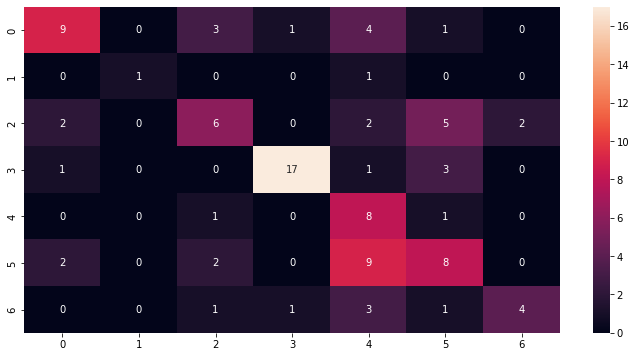

In [75]:
sns.heatmap(cm,annot=True)

In [42]:
l=['angry','disgust','fear','happy','neutral','sad','surprise']